In [22]:
import torch
import numpy as np
from score_models.plot_utils import *

# Diffusion

Diffusion is a rather old concept in physics. The phenomena was first discovered by botanist Robert Brown in 1827 when he was studying the movement of molecules suspended in a stationary liquid. An explanation of Brownian motion was developped by [Einstein in 1905](https://www.damtp.cam.ac.uk/user/gold/pdfs/teaching/old_literature/Einstein1905.pdf), linking Brownian motion to the kinetic theory of heat dissipation.

In this section, we will build a diffusion model from scratch. 
To do this, I provide a minimal description of stochastic processes based on
Brownian motion and Langevin dynamics.
I try to keep the theoretical description of diffusion to a minimum to avoid overloading this section with technical 
concepts, though I must minimally touch on the heat equation and the Fokker-Planck equation to give the full picture.

I have decided to mute the connection with thermodynamic to some degree. 
Of course, thermodynamic served as the main inspiration for the invention of diffusion models ([Sohl-Dickstein et al. 2015](https://arxiv.org/abs/1503.03585)). So I might eventually explore this work in a separate section. 

## Brownian motion

The formal description of Brownian motion is named after Norbert Wiener, 
who studied the mathematical properties of one-dimensional stochastic processes. 
Put simply, a stochastic process is akin to a curve &mdash; though this curve is nowhere differentiable &mdash; defined by a series of *random increments*.
A Wiener process is the simplest case where each increments, $\Delta \mathbf{w}_{t} = \mathbf{w}_{t + \Delta t} - \mathbf{w}_t $, are identically and independently distributed (iid) with a Gaussian distribution 

$$
    \Delta \mathbf{w}_{t} \sim \mathcal{N}(0, \Delta t)
$$

$t$ is interpreted as the time elapsed for the process. 
The typical length of the Brownian motion is proportional to the time elapsed. More specifically, 
the length is proportional to $\sqrt{\Delta t}$, since $\Delta t$ corresponds to the *variance* of the increment 
distribution. Below we give an example of a Wiener process, 
where we discretize a Brownian motion into $N$ intervals. 
In that case, we can describe the random variable $\mathbf{w}_t$ as a sum over $N$ independent increment

$$
    \mathbf{w}_t = \sum_{i = 0}^{N-1} \Delta \mathbf{w}_{i \Delta t}
$$


In [23]:
N = 1000
dt = 1/N

# Wiener process
w = torch.zeros(1) # W_0 = 0
t = 0
states = [(t, w)]
for n in range(N):
    dw = torch.randn_like(w) * dt**0.5 # dW_n ~ N(0, dt)
    w = w + dw
    t = t + dt
    states.append((t, w))

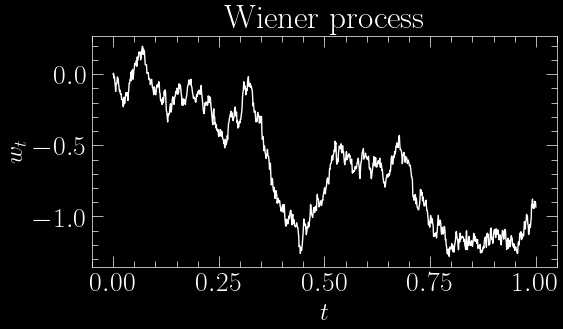

In [26]:
plt.figure(figsize=(6, 3))
plt.plot(*list(zip(*states)), color="w")
plt.ylabel(r'$w_t$')
plt.xlabel(r'$t$')
plt.title('Wiener process');

I mentionned above that this curve is nowhere differentiable. This means that if we were to zoom-in on this curve, we would never obtain a smooth curve. This process is self-similar &mdash; no matter how fine the discretization, we always find discontinuous random increments. 

This realization has several interesting consequences. 
Though for our current purposes, it means that the kinetic picture, shown above, cannot be studied with classical tools like calculus &mdash; which is only suited for the study of smooth curves. 
Instead of introducing the rules of stochastic calculus, we instead consider the statistical ensemble picture. 

This is to say that we would like to understand the distribution of the Brownian motion, $p(\mathbf{w}_t)$, and its evolution in time.

## The Heat equation

## Langevin dynamics

## The Fokker-Planck equation

## Anderson's reverse-time formula

## Tweedie's formula
Denoising is intimately connected to learning a distribution. This connection is most evident in Tweedie's formula, first reported by [Robbins (1956)](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-35/issue-1/The-Empirical-Bayes-Approach-to-Statistical-Decision-Problems/10.1214/aoms/1177703729.full).
Tweedie's formula gives an expression for the optimal denoiser at first order, which is given by the following expectation,
$$
\mathbb{E}[\mathbf{x}_0 \mid \mathbf{x}_t] = \mathbf{x}_t + \sigma^2(t) \nabla_{\mathbf{x}_t} \log p_t(\mathbf{x}_t)\, .
$$
In other words, the score function is the optimal denoiser at first order. More importantly, this connection between denoising and the score function will allow us to move back and forth between the two pictures to construct a scalable framework for learning distributions from samples in high-dimensional spaces.